<a href="https://colab.research.google.com/github/RonnyGuevara/Machine-Learning/blob/main/PRUEBA4/ETL2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Lectura de librerías
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Lectura de la data
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/ETL2.xlsx')
df

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación
0,Entre 50 y 59 años,1.50,65.0,3,26,52,28.888889,Posgrados
1,Entre 20 y 29 años,1.65,61.0,0,26,49,22.405877,Universitario y terciario completo
2,Entre 40 y 49 años,1.52,105.0,22,29,68,45.446676,Universitario incompleto o terciario incompleto
3,Entre 20 y 29 años,1.60,54.0,1,26,42,21.093750,Posgrados
4,Entre 40 y 49 años,1.65,64.0,5,24,45,23.507805,Posgrados
...,...,...,...,...,...,...,...,...
69,Entre 40 y 49 años,1.68,80.0,4,27,79,28.344671,Universitario incompleto o terciario incompleto
70,Entre 20 y 29 años,1.56,50.0,11,26,92,20.545694,Secundario completo
71,Entre 20 y 29 años,1.62,46.0,2,22,40,17.527816,Universitario incompleto o terciario incompleto
72,Entre 20 y 29 años,1.64,59.0,5,27,55,21.936347,Universitario incompleto o terciario incompleto


In [ ]:
#Visualización de los atributos
df.columns

Index(['Edad', 'Altura', 'Peso', 'BECK ', 'STAI.ANSIEDAD', 'BULLIT', 'IMC',
       'Nivel de educación'],
      dtype='object')

In [ ]:
#Cuenta los valores nulos para cada columna
df.isna().sum()

Edad                  0
Altura                0
Peso                  0
BECK                  0
STAI.ANSIEDAD         0
BULLIT                0
IMC                   0
Nivel de educación    0
dtype: int64

In [ ]:
#Total de valores nulos
df.isnull().values.sum()

0

In [ ]:
# Eliminación de valores nulos en caso de tenerlos
df = df.dropna()

In [ ]:
#info() devuelve el total de valores no nulos y tipo de dato para cada atributo
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                74 non-null     object 
 1   Altura              74 non-null     float64
 2   Peso                74 non-null     float64
 3   BECK                74 non-null     int64  
 4   STAI.ANSIEDAD       74 non-null     int64  
 5   BULLIT              74 non-null     int64  
 6   IMC                 74 non-null     float64
 7   Nivel de educación  74 non-null     object 
dtypes: float64(3), int64(3), object(2)
memory usage: 5.2+ KB


In [ ]:
#Permite obtener los estadísticos descriptivos
df.describe()

,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.625811,70.381081,10.405405,25.216216,59.324324,26.585722
std,0.065835,16.652654,9.367561,3.508386,20.453829,5.834378
min,1.440000,45.000000,0.000000,19.000000,33.000000,16.528926
25%,1.592500,58.000000,3.000000,23.000000,44.000000,22.146735
50%,1.625000,66.500000,8.000000,25.000000,53.500000,25.233893
75%,1.657500,80.000000,15.750000,27.000000,70.500000,29.865328
max,1.780000,125.000000,42.000000,34.000000,128.000000,45.446676


In [ ]:
df.corr()

,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC
Altura,1.000000,0.359658,0.224914,0.152838,0.329913,-0.012133
Peso,0.359658,1.000000,0.361504,0.099369,0.523422,0.924868
BECK,0.224914,0.361504,1.000000,0.532070,0.540307,0.299246
STAI.ANSIEDAD,0.152838,0.099369,0.532070,1.000000,0.423560,0.048181
BULLIT,0.329913,0.523422,0.540307,0.423560,1.000000,0.413068
IMC,-0.012133,0.924868,0.299246,0.048181,0.413068,1.000000


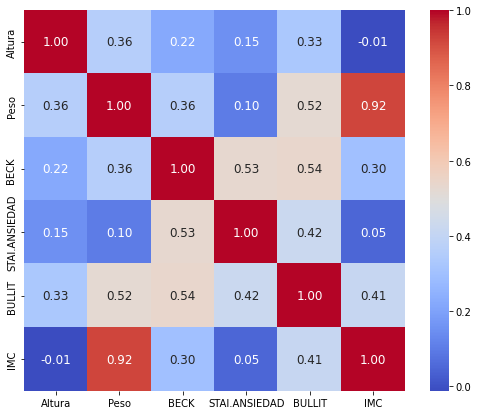

In [ ]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')
color de blanco a rojo 

Reducción de la dimensionalidad
Proceso de decodificación de datos

In [ ]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

In [ ]:
labelEncoder = LabelEncoder()
df["Edad"] = labelEncoder.fit_transform(df["Edad"])
df["Nivel de educación"] = labelEncoder.fit_transform(df["Nivel de educación"])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 74 entries, 0 to 73
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Edad                74 non-null     int64  
 1   Altura              74 non-null     float64
 2   Peso                74 non-null     float64
 3   BECK                74 non-null     int64  
 4   STAI.ANSIEDAD       74 non-null     int64  
 5   BULLIT              74 non-null     int64  
 6   IMC                 74 non-null     float64
 7   Nivel de educación  74 non-null     int64  
dtypes: float64(3), int64(5)
memory usage: 5.2 KB


In [ ]:
df

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación
0,3,1.50,65.0,3,26,52,28.888889,0
1,0,1.65,61.0,0,26,49,22.405877,5
2,2,1.52,105.0,22,29,68,45.446676,4
3,0,1.60,54.0,1,26,42,21.093750,0
4,2,1.65,64.0,5,24,45,23.507805,0
...,...,...,...,...,...,...,...,...
69,2,1.68,80.0,4,27,79,28.344671,4
70,0,1.56,50.0,11,26,92,20.545694,2
71,0,1.62,46.0,2,22,40,17.527816,4
72,0,1.64,59.0,5,27,55,21.936347,4


In [ ]:
df.describe()

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación
count,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000,74.000000
mean,1.310811,1.625811,70.381081,10.405405,25.216216,59.324324,26.585722,3.297297
std,1.259764,0.065835,16.652654,9.367561,3.508386,20.453829,5.834378,1.619485
min,0.000000,1.440000,45.000000,0.000000,19.000000,33.000000,16.528926,0.000000
25%,0.000000,1.592500,58.000000,3.000000,23.000000,44.000000,22.146735,2.000000
50%,1.000000,1.625000,66.500000,8.000000,25.000000,53.500000,25.233893,4.000000
75%,2.750000,1.657500,80.000000,15.750000,27.000000,70.500000,29.865328,4.750000
max,3.000000,1.780000,125.000000,42.000000,34.000000,128.000000,45.446676,5.000000


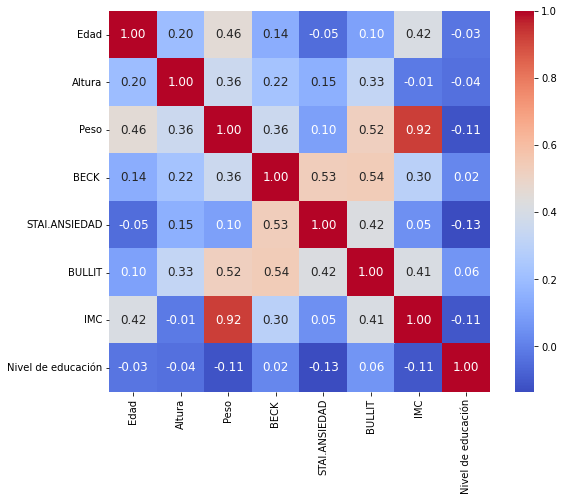

In [ ]:
corr = df.corr()
plt.figure(figsize=(9,7))
sns.heatmap(corr, cbar = True,  square = True, annot=True, fmt= '.2f',annot_kws={'size': 12},
           xticklabels= corr, yticklabels= corr,
           cmap= 'coolwarm')

Revisión de atipico

In [ ]:
import numpy as np

def atipicos_columna(y, column):
    '''
        Busca y cuenta los atípicos en un vector pasado por parámetro.
        Se basa en el rango intercuartil.
    '''
    # Calcular rango intercuartil
    y_df = pd.DataFrame({'y': y})

    q25, q75 = np.percentile(y_df['y'], 25), np.percentile(y_df['y'], 75)
    iqr = q75 - q25

    # Calcule el rango de valores atípicos
    k = 1.5
    range_ir = iqr * k

    # Límites
    lower_bound_ir, upper_bound_ir = q25 - range_ir, q75 + range_ir

    # Creacion de mascaras y busqueda de atípicos y no atípicos
    outliers_mask_ir = [True if x < lower_bound_ir or x > upper_bound_ir else False for x in y_df['y']]
    no_outliers_mask_ir = [False if x < lower_bound_ir or x > upper_bound_ir else True for x in y_df['y']]

    outliers = y_df['y'][outliers_mask_ir]
    no_outliers = y_df['y'][no_outliers_mask_ir]

    print("-- Columna: ",column,"   \t->",outliers.shape[0])

def atipicos(df, inicio = 0):
    '''
        Busca y cuenta atípicos en todo el DataFrame pasado por parámetro
    '''
    print("Cantidad de atipicos: ")
    for column in df.columns[inicio:]:
        atipicos_columna(df[column].values, column)

In [ ]:
atipicos(df)

Cantidad de atipicos: 
-- Columna:  Edad    	-> 0
-- Columna:  Altura    	-> 4
-- Columna:  Peso    	-> 1
-- Columna:  BECK     	-> 1
-- Columna:  STAI.ANSIEDAD    	-> 2
-- Columna:  BULLIT    	-> 2
-- Columna:  IMC    	-> 1
-- Columna:  Nivel de educación    	-> 0


Visualización de las distribuciones de cada una de las variables

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def print_hist(data,title, ax):
    '''
        print_hist:
            Función para dibujar el histograma y la distribución de los datos.
    '''
    sns.histplot(data, alpha=0.4, kde=True, ax=ax)
    sns.rugplot(data, color="black", ax=ax)
    
    color = "orange"
    text=f"$\\mu$ = {data.mean():.3f}\n"
    text+=f"$\\sigma$ = {data.std(ddof=1):.3f}"

    bbox = dict(boxstyle='round', fc=color, ec=color, alpha=0.3)
    ax.text(0.72, 0.8, text, fontsize=11, bbox=bbox, transform=ax.transAxes)
    ax.set_title(title)

def print_dataset(df, fig_rows, fig_cols):
    '''
        print_dataset:
            Recibe un DataFrame, dibuja sus distribuciones de datos y cuenta cuántos tienen distribución normal
    '''
    cols = df.columns
    fig, axes = plt.subplots(fig_rows, fig_cols, figsize=((fig_cols*25)//5, (fig_rows*8)//2))
    axes = axes.ravel()

    for col_name, ax in zip(cols, axes):
        print_hist(df[col_name],"Distribución de " + col_name, ax)

    fig.tight_layout()
    plt.show()

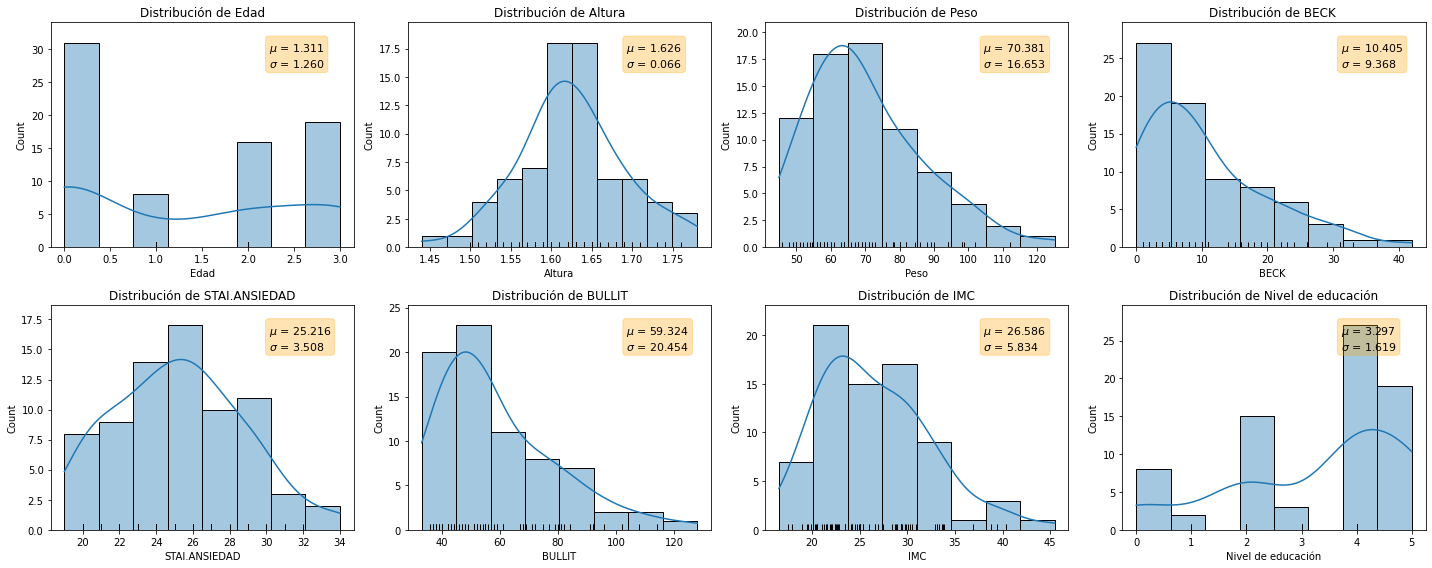

In [ ]:
print_dataset(df, 2, 4)

Verificación de valores atípicos utilizando box plot

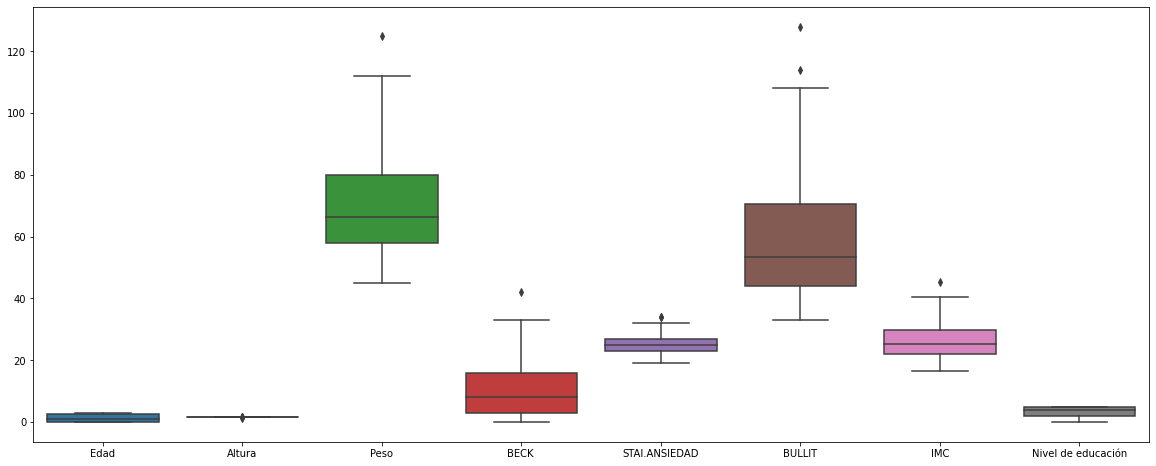

In [ ]:
plt.figure(figsize = (20, 8))
sns.boxplot(data = df, width = 0.8)
plt.show()

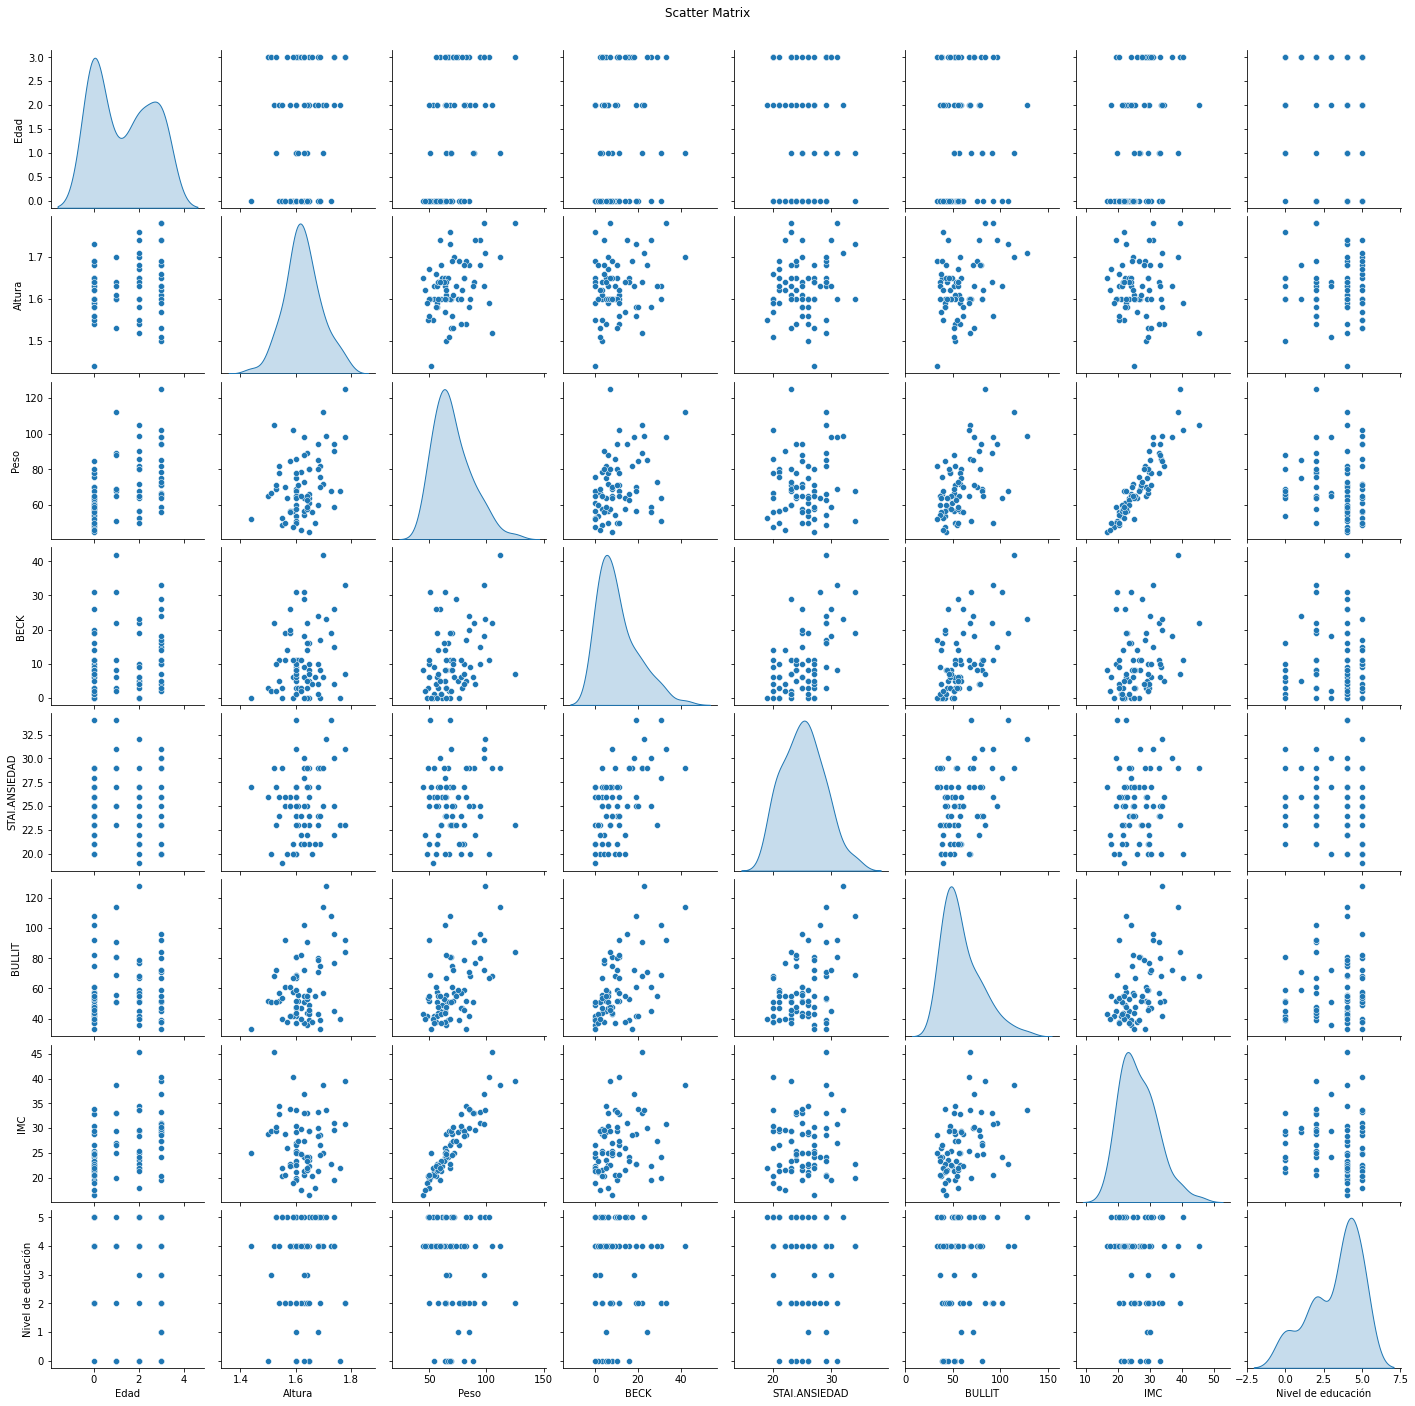

In [ ]:
pg = sns.pairplot(data = df, diag_kind='kde')
pg.fig.suptitle('Scatter Matrix')
pg.fig.subplots_adjust(top=0.95)

añadir linea de correlacion en la grafica ------

Escalamiento de datos
Es importante eliminar valores atípicos en los datos y trabajar a una misma escala.

In [ ]:
from sklearn.preprocessing import normalize

def normalizacion(x):
    x = x/x.max()
    return x

def estandarizacion(x):
    x_mean= x.mean()
    x_std= x.std()
    
    x = (x-x_mean)/x_std
    return x

Aplicando normalizacion: 


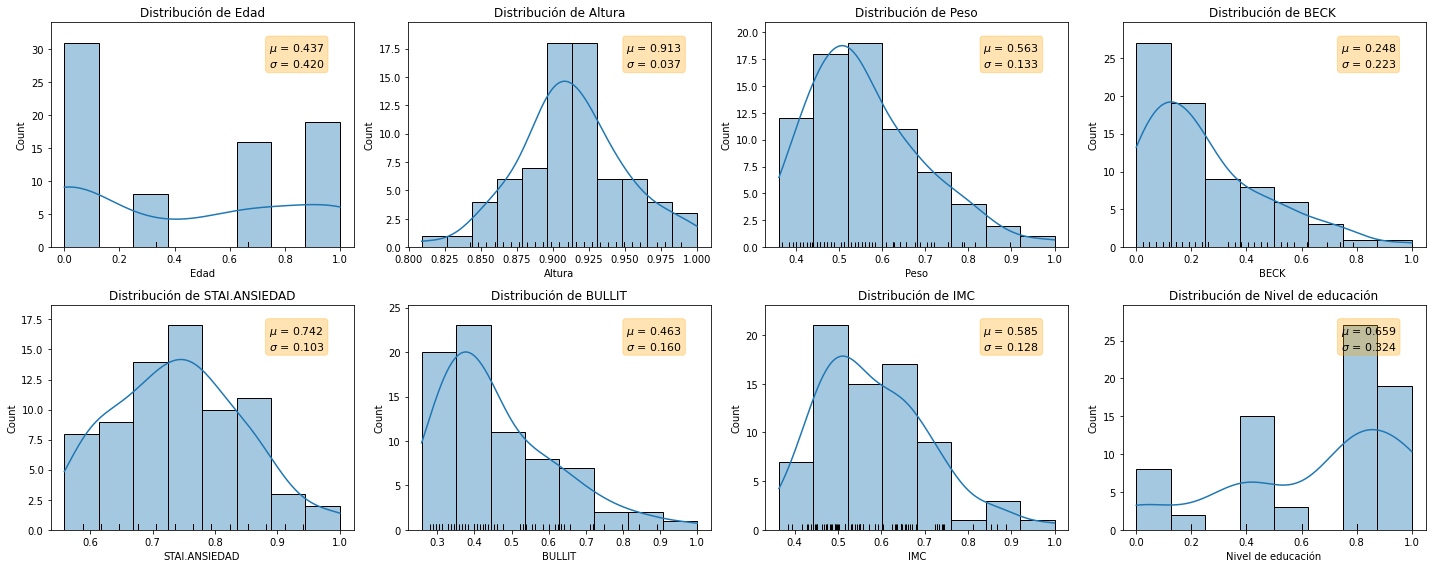

In [ ]:
df_n = pd.DataFrame()
for col in df.columns:
    df_n[col] = normalizacion(df[col])
print("Aplicando normalizacion: ")
print_dataset(df_n, 2, 4)

In [ ]:
df_n

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación
0,1.000000,0.842697,0.520,0.071429,0.764706,0.406250,0.635666,0.0
1,0.000000,0.926966,0.488,0.000000,0.764706,0.382812,0.493015,1.0
2,0.666667,0.853933,0.840,0.523810,0.852941,0.531250,1.000000,0.8
3,0.000000,0.898876,0.432,0.023810,0.764706,0.328125,0.464143,0.0
4,0.666667,0.926966,0.512,0.119048,0.705882,0.351562,0.517261,0.0
...,...,...,...,...,...,...,...,...
69,0.666667,0.943820,0.640,0.095238,0.794118,0.617188,0.623691,0.8
70,0.000000,0.876404,0.400,0.261905,0.764706,0.718750,0.452084,0.4
71,0.000000,0.910112,0.368,0.047619,0.647059,0.312500,0.385679,0.8
72,0.000000,0.921348,0.472,0.119048,0.794118,0.429688,0.482683,0.8


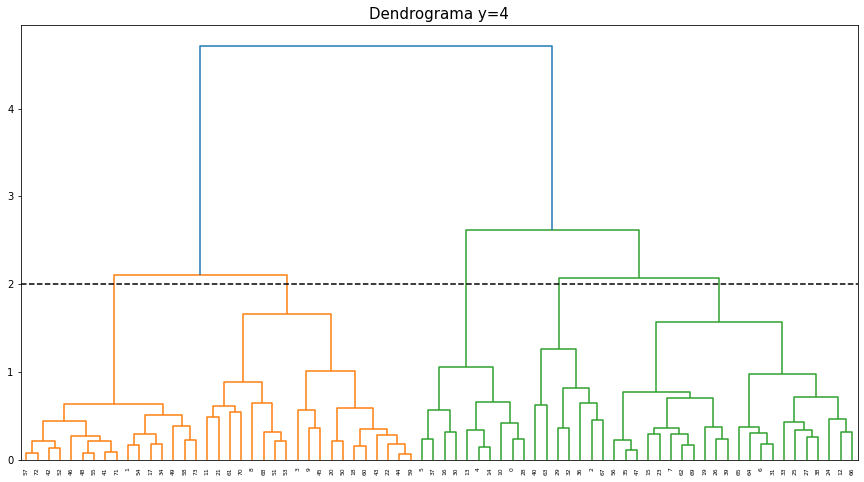

In [ ]:
import scipy.cluster.hierarchy as shc

#Dendrograma con línea de corte en y = 4
plt.figure(figsize=(15, 8))  
plt.title("Dendrograma y=4", fontsize = 15)
line = shc.linkage(df_n, method='ward')
dend = shc.dendrogram( line )
plt.axhline(y=2, color='black', linestyle='--')
plt.show()

In [ ]:
from sklearn.cluster import KMeans

wcss = []
for i in range (1,11):
  kmeans = KMeans(n_clusters=i, max_iter = 300)
  kmeans.fit(df_n)
  wcss.append(kmeans.inertia_)

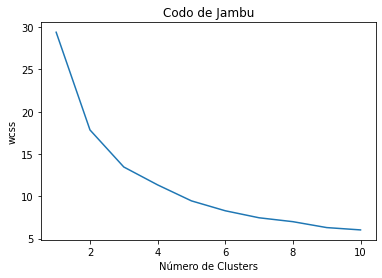

In [ ]:
plt.plot(range(1,11),wcss)
plt.title("Codo de Jambu")
plt.xlabel("Número de Clusters")
plt.ylabel("wcss")
plt.show()

Cluster: Agrupación jerárquica aglomerativa

In [ ]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
cluster.fit_predict(df_n)

array([2, 3, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 3, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 1,
       1, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 3, 3, 3])

In [ ]:
cluster.labels_

array([2, 3, 0, 1, 2, 2, 0, 0, 1, 1, 2, 1, 0, 2, 2, 0, 2, 3, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 2, 0, 2, 0, 0, 0, 3, 0, 0, 2, 0, 0, 0, 3, 3, 1,
       1, 1, 3, 0, 3, 3, 1, 1, 3, 1, 3, 3, 0, 3, 3, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 3, 3, 3])

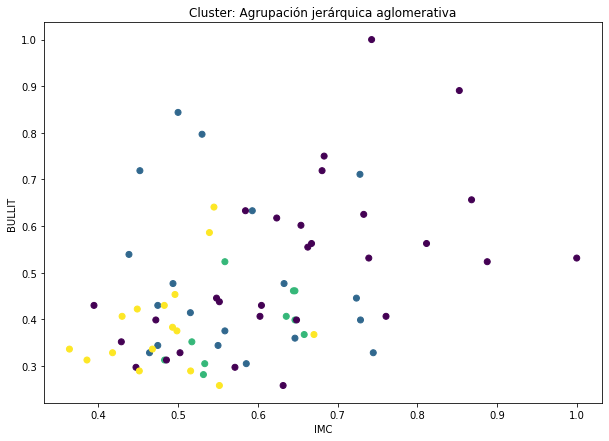

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(df_n['IMC'], df_n['BULLIT'], c=cluster.labels_)
plt.title("Cluster: Agrupación jerárquica aglomerativa")
plt.xlabel("IMC")
plt.ylabel("BULLIT")
plt.show()

pedir la coordenadas de centroide en las 4 clases .-------.

Aplicando estandarizacion: 


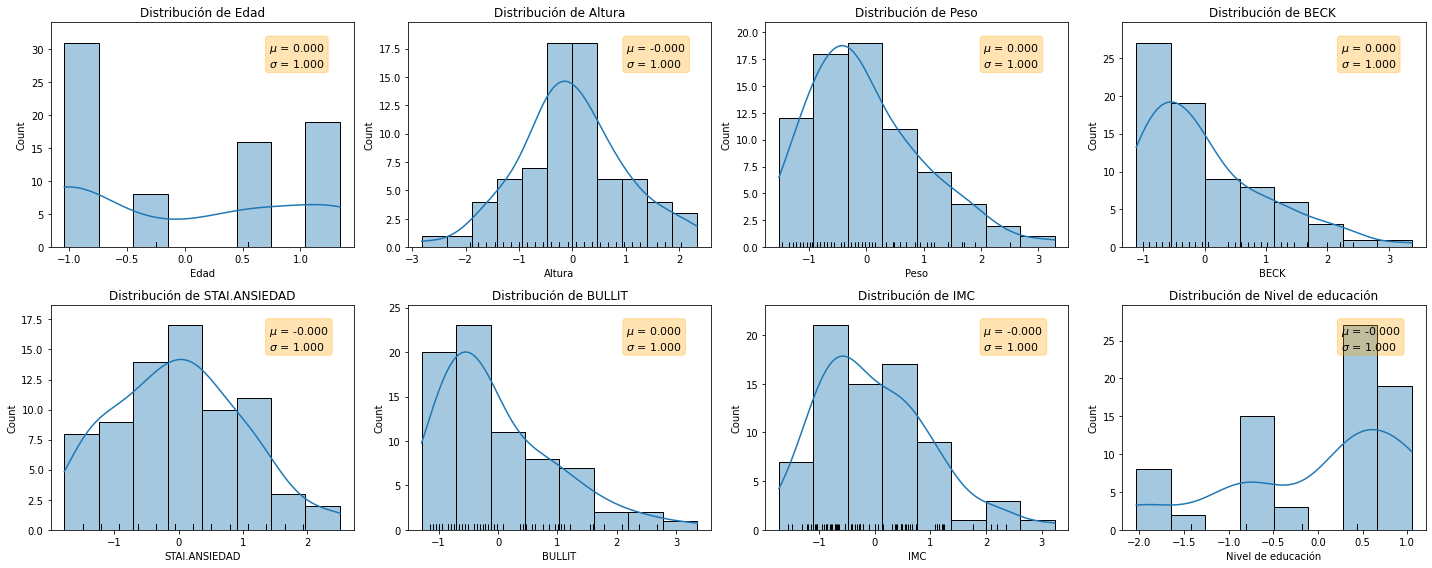

In [ ]:
df_e = pd.DataFrame()
for col in df.columns:
    df_e[col] = estandarizacion(df[col])
print("Aplicando estandarizacion: ")
print_dataset(df_e, 2, 4)

Aplicando normalizacion l1: 


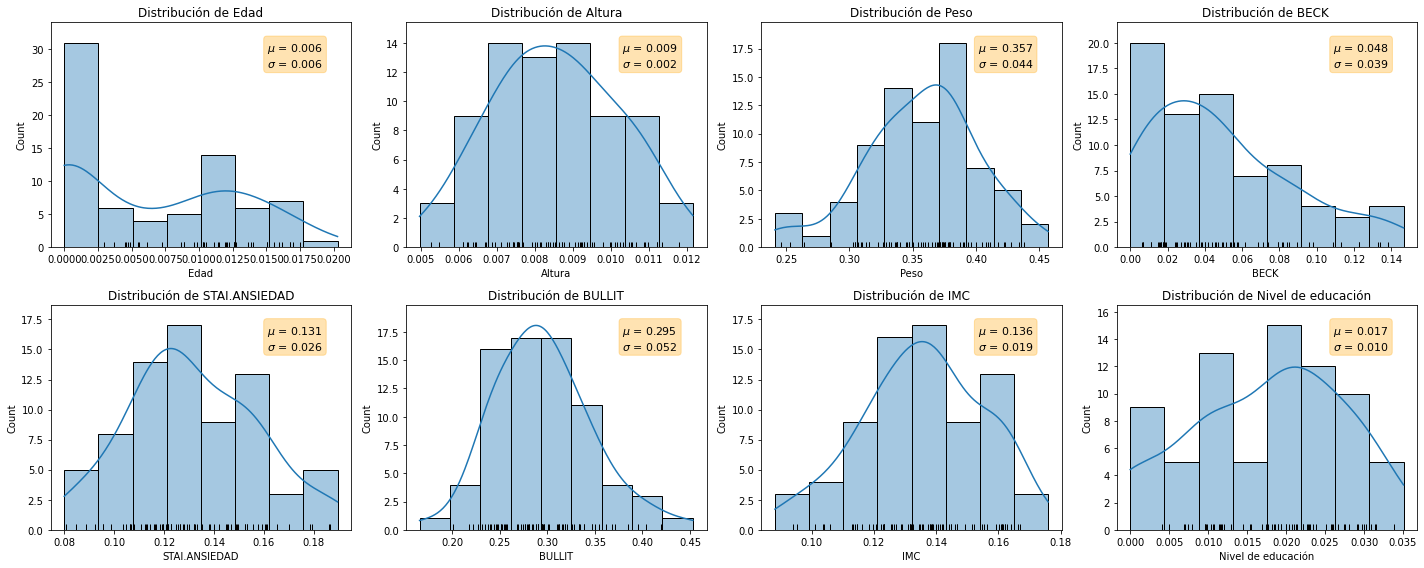

In [ ]:
df_l1 = normalize(df, norm="l1")
df_l1 = pd.DataFrame(df_l1, columns = df.columns)
print("Aplicando normalizacion l1: ")
print_dataset(df_l1, 2, 4)

Aplicando normalizacion l2: 


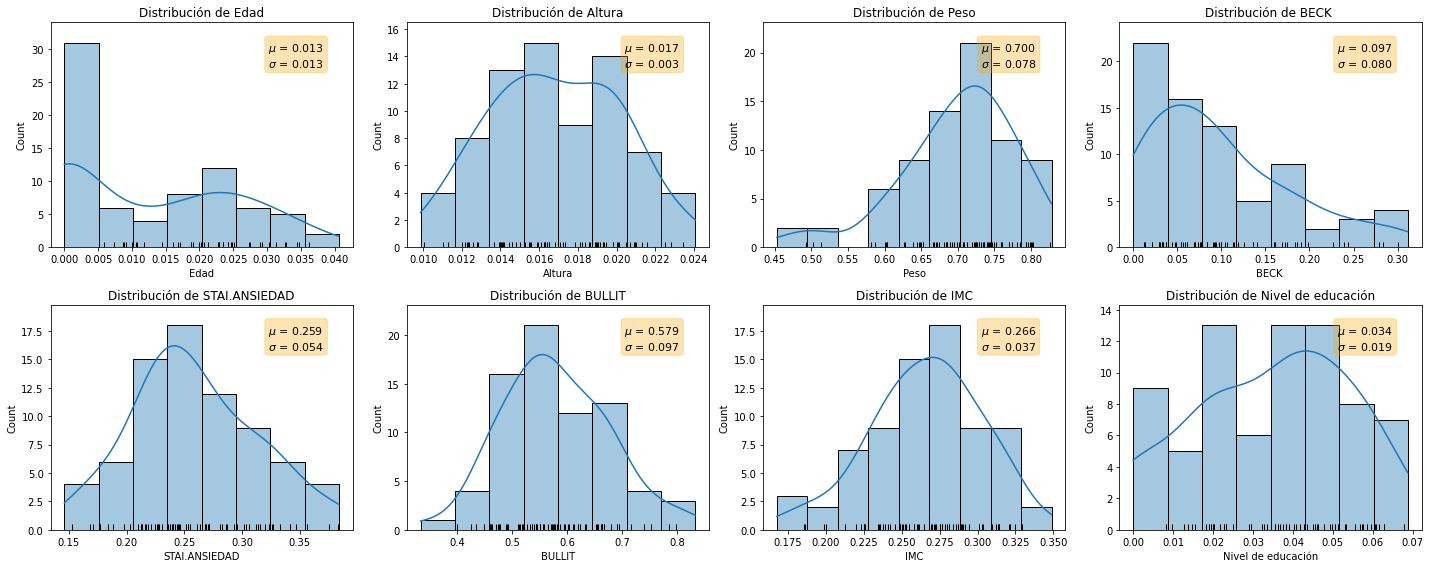

In [ ]:
df_l2 = normalize(df, norm="l2")
df_l2 = pd.DataFrame(df_l2, columns = df.columns)
print("Aplicando normalizacion l2: ")
print_dataset(df_l2, 2, 4)

Aplicando normalizacion max: 


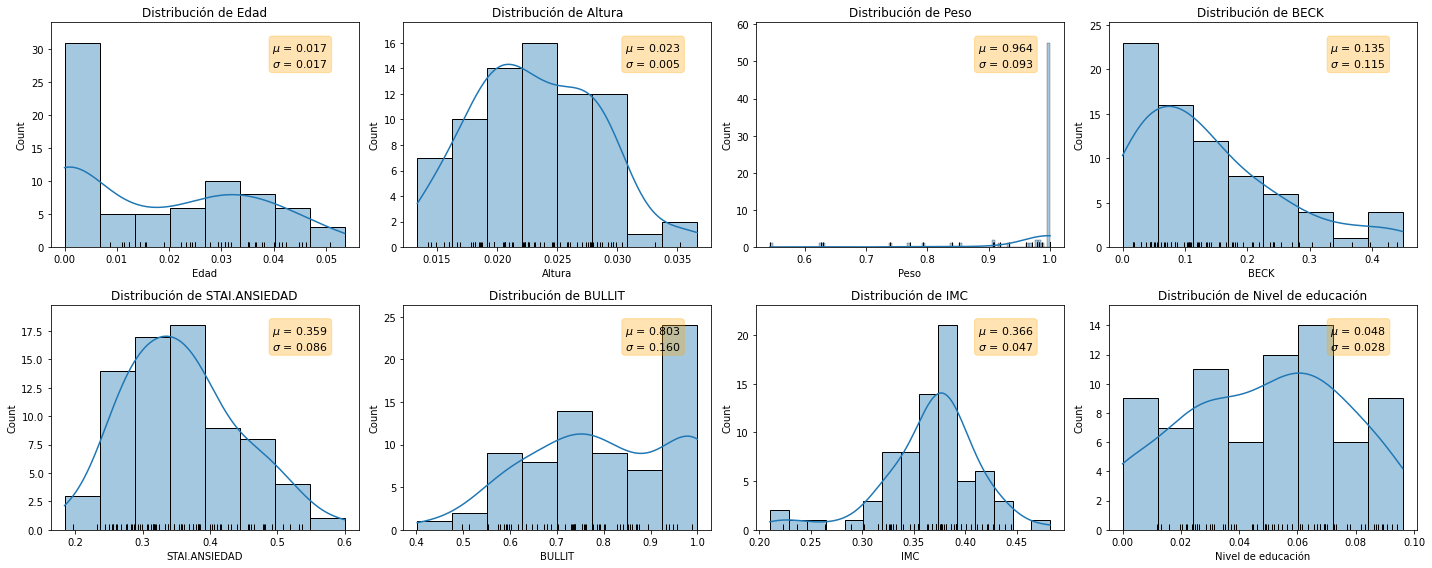

In [ ]:
df_max = normalize(df, norm="max")
df_max = pd.DataFrame(df_max, columns = df.columns)
print("Aplicando normalizacion max: ")
print_dataset(df_max, 2, 4)

Definicion de modelos
Funciones para la evaluación de los modelos

In [ ]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

def evaluacion_modelo(df, labels):
    '''
        evaluacion_modelo:
            Función que devuelve los indices de Silhoette y Davies Bouldin
            de una agrupacion de datos
    '''
    if labels.shape[0]>1:
        silhouette = silhouette_score(df,labels)
        davies_bouldin = davies_bouldin_score(df,labels)
    else:
        silhouette = -1
        davies_bouldin = 80
    return (silhouette, davies_bouldin)

def buscar_optimo(conjunto):
    '''
        buscar_optimo:
            Utilizando la funcion evaluacion_modelo devuelve el modelo con mejores
            métricas y realiza un pequeño informe del mismo

            Parametro:
                conjunto = list(
                    DataFrame utilizado (pd.DataFrame), 
                    modelo de clustering (sklearn.cluster), 
                    metricas obtenidas (list(silhouette,davies_bouldin)), 
                    nombre del modelo (str)
                )
            Devuelve:
                df_op: una copia del DataFrame utilizado
                model: modelo de clustering óptimo
    '''
    i_op = 0
    sl_op = -1
    db_op = 80
    for i in range(len(conjunto)):
        if conjunto[i][2][0]>sl_op and conjunto[i][2][1]<db_op:
            i_op = i
            sl_op = conjunto[i][2][0]
            db_op = conjunto[i][2][1]

    df_op = pd.DataFrame.copy(conjunto[i_op][0])
    model = conjunto[i_op][1]

    print("DataFrame optimo:",conjunto[i_op][-1])
    print("Modelo optimo:",model)
    print("Cantidad de clusters:",np.max(model.labels_)+1)
    print("Metricas:")
    print(f"-- Indice de Silhuette (ideal 1): {sl_op:.3f}")
    print(f"-- Indice de Davies Bouldin (mejor menor): {db_op:.3f}")

    return df_op, model

def print_clusters(df, model, name_model):
    '''
        print_clusters:
            Imprime el ScatterPlot del DataFrame pasado por parámetro
            Pinta con colores los Clusters identificados por el modelo
    '''
    df["name_model"] = model.labels_
    df[name_model+"_cluster"] = model.labels_
    sns.pairplot(data = df, hue="name_model")
    df = df.drop("name_model",axis=1)
    df = df.drop(name_model+"_cluster",axis=1)

KMeans

In [ ]:
from sklearn.cluster import KMeans

def kmeans_model(df):
    optimo = []
    metricas_optimo = [-1, 80]
    for i in range(2, int(np.sqrt(df.shape[0]))):
        kmeans = KMeans(n_clusters=i, random_state=0)
        kmeans.fit(df)
        metricas = evaluacion_modelo(df, kmeans.labels_)
        if metricas[0]>metricas_optimo[0] and metricas[1]<metricas_optimo[1]:
            optimo = kmeans
            metricas_optimo = metricas
    print("Modelo: ", optimo)
    print("Metricas:")
    print(f"-- Indice de Silhuette (ideal 1): {metricas_optimo[0]:.3f}")
    print(f"-- Indice de Davies Bouldin (mejor menor): {metricas_optimo[1]:.3f}")
    return optimo, metricas_optimo

In [ ]:
conjunto = []

In [ ]:
kmeans, metricas = kmeans_model(df)
conjunto.append((df,kmeans,metricas,"df"))

Modelo:  KMeans(n_clusters=2, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.466
-- Indice de Davies Bouldin (mejor menor): 0.912


In [ ]:
kmeans, metricas = kmeans_model(df_n)
conjunto.append((df,kmeans,metricas,"df_n"))

Modelo:  KMeans(n_clusters=3, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.363
-- Indice de Davies Bouldin (mejor menor): 1.128


In [ ]:
kmeans, metricas = kmeans_model(df_e)
conjunto.append((df,kmeans,metricas,"df_le"))

Modelo:  KMeans(n_clusters=2, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.270
-- Indice de Davies Bouldin (mejor menor): 1.537


In [ ]:
kmeans, metricas = kmeans_model(df_l1)
conjunto.append((df,kmeans,metricas,"df_l1"))

Modelo:  KMeans(n_clusters=2, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.344
-- Indice de Davies Bouldin (mejor menor): 1.128


In [ ]:
kmeans, metricas = kmeans_model(df_l2)
conjunto.append((df,kmeans,metricas,"df_l2"))

Modelo:  KMeans(n_clusters=2, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.353
-- Indice de Davies Bouldin (mejor menor): 1.106


In [ ]:
kmeans, metricas = kmeans_model(df_max)
conjunto.append((df,kmeans,metricas,"df_max"))

Modelo:  KMeans(n_clusters=2, random_state=0)
Metricas:
-- Indice de Silhuette (ideal 1): 0.353
-- Indice de Davies Bouldin (mejor menor): 1.177


Mejor modelo junto a su dataset asociado

DataFrame optimo: df
Modelo optimo: KMeans(n_clusters=2, random_state=0)
Cantidad de clusters: 2
Metricas:
-- Indice de Silhuette (ideal 1): 0.466
-- Indice de Davies Bouldin (mejor menor): 0.912


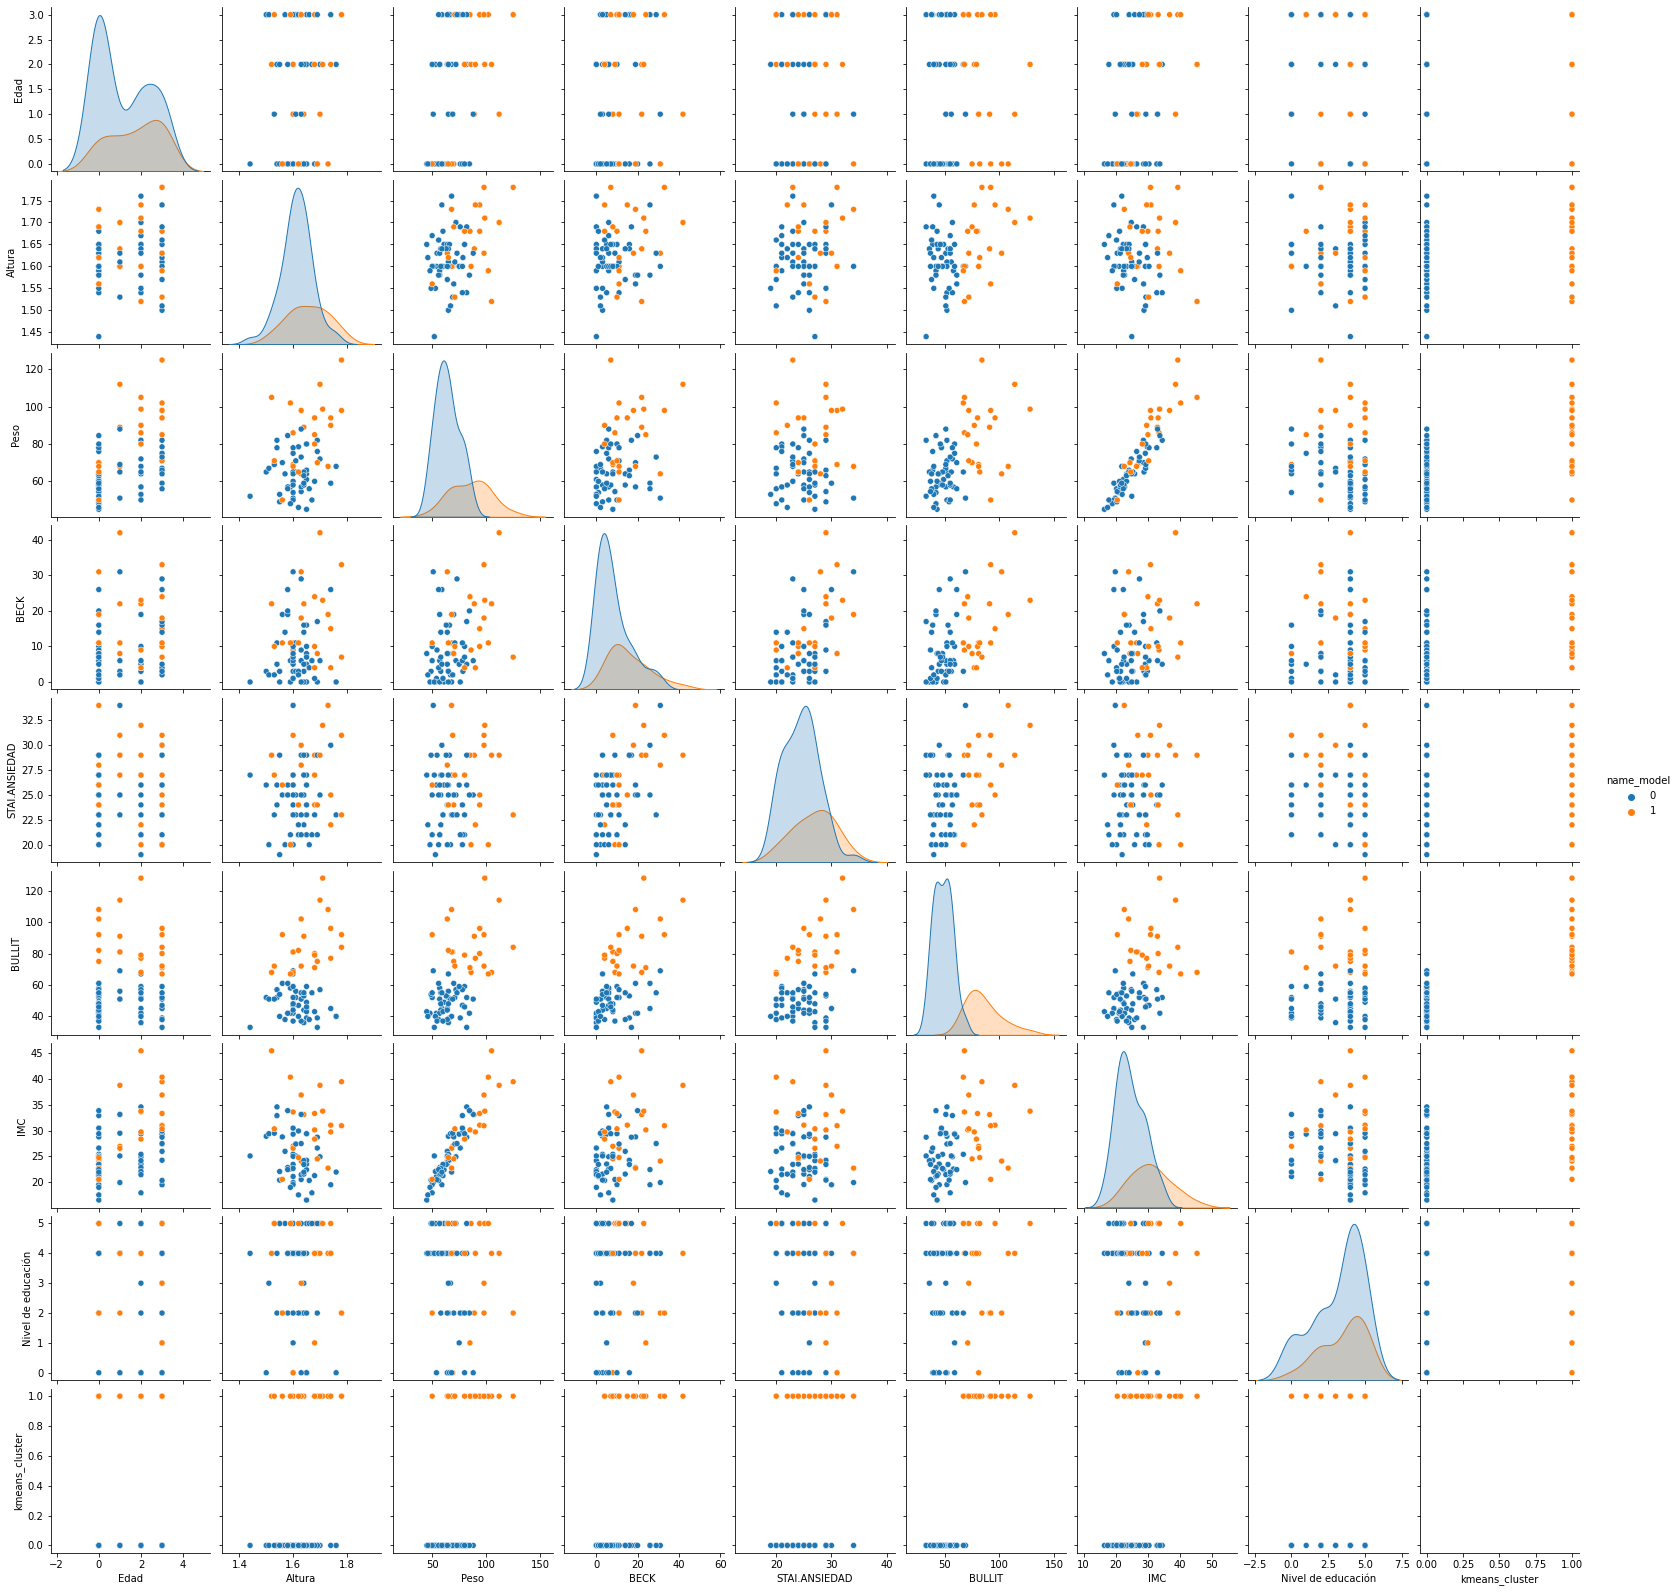

In [ ]:
df_op, kmeans = buscar_optimo(conjunto)
print_clusters(df_op, kmeans, "kmeans")

Mean shift

In [ ]:
from sklearn.cluster import MeanShift, estimate_bandwidth

def mean_shift_model(df):
    bandwidth = estimate_bandwidth(df, quantile=0.3)
    # ms = MeanShift(bandwidth=bandwidth,bin_seeding=True, n_jobs=4)
    ms = MeanShift(bandwidth=bandwidth)
    # ms = MeanShift(bin_seeding=True)
    # ms = MeanShift()
    ms.fit(df)

    metricas = evaluacion_modelo(df, ms.labels_)
    print("Modelo: ", ms)
    print("Metricas: ")
    print(f"-- Indice de Silhuette (ideal 1): {metricas[0]:.3f}")
    print(f"-- Indice de Davies Bouldin (mejor menor): {metricas[1]:.3f}")
    return ms, metricas

In [ ]:
conjunto = []

In [ ]:
ms, metricas = mean_shift_model(df)
conjunto.append((df,ms,metricas,"df"))

Modelo:  MeanShift(bandwidth=25.09557798191978)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.385
-- Indice de Davies Bouldin (mejor menor): 0.759


In [ ]:
ms, metricas = mean_shift_model(df_n)
conjunto.append((df,ms,metricas,"df_n"))

Modelo:  MeanShift(bandwidth=0.6434701898488914)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.309
-- Indice de Davies Bouldin (mejor menor): 1.322


In [ ]:
ms, metricas = mean_shift_model(df_e)
conjunto.append((df,ms,metricas,"df_le"))

Modelo:  MeanShift(bandwidth=3.131822388875575)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.309
-- Indice de Davies Bouldin (mejor menor): 1.233


In [ ]:
ms, metricas = mean_shift_model(df_l1)
conjunto.append((df,ms,metricas,"df_l1"))

Modelo:  MeanShift(bandwidth=0.08187273843693292)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.363
-- Indice de Davies Bouldin (mejor menor): 1.178


In [ ]:
ms, metricas = mean_shift_model(df_l2)
conjunto.append((df,ms,metricas,"df_l2"))

Modelo:  MeanShift(bandwidth=0.15569594582875457)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.378
-- Indice de Davies Bouldin (mejor menor): 1.070


In [ ]:
ms, metricas = mean_shift_model(df_max)
conjunto.append((df,ms,metricas,"df_max"))

Modelo:  MeanShift(bandwidth=0.23551548969214284)
Metricas: 
-- Indice de Silhuette (ideal 1): 0.331
-- Indice de Davies Bouldin (mejor menor): 1.287


Mejor modelo junto a su dataset asociado

DataFrame optimo: df
Modelo optimo: MeanShift(bandwidth=25.09557798191978)
Cantidad de clusters: 5
Metricas:
-- Indice de Silhuette (ideal 1): 0.385
-- Indice de Davies Bouldin (mejor menor): 0.759


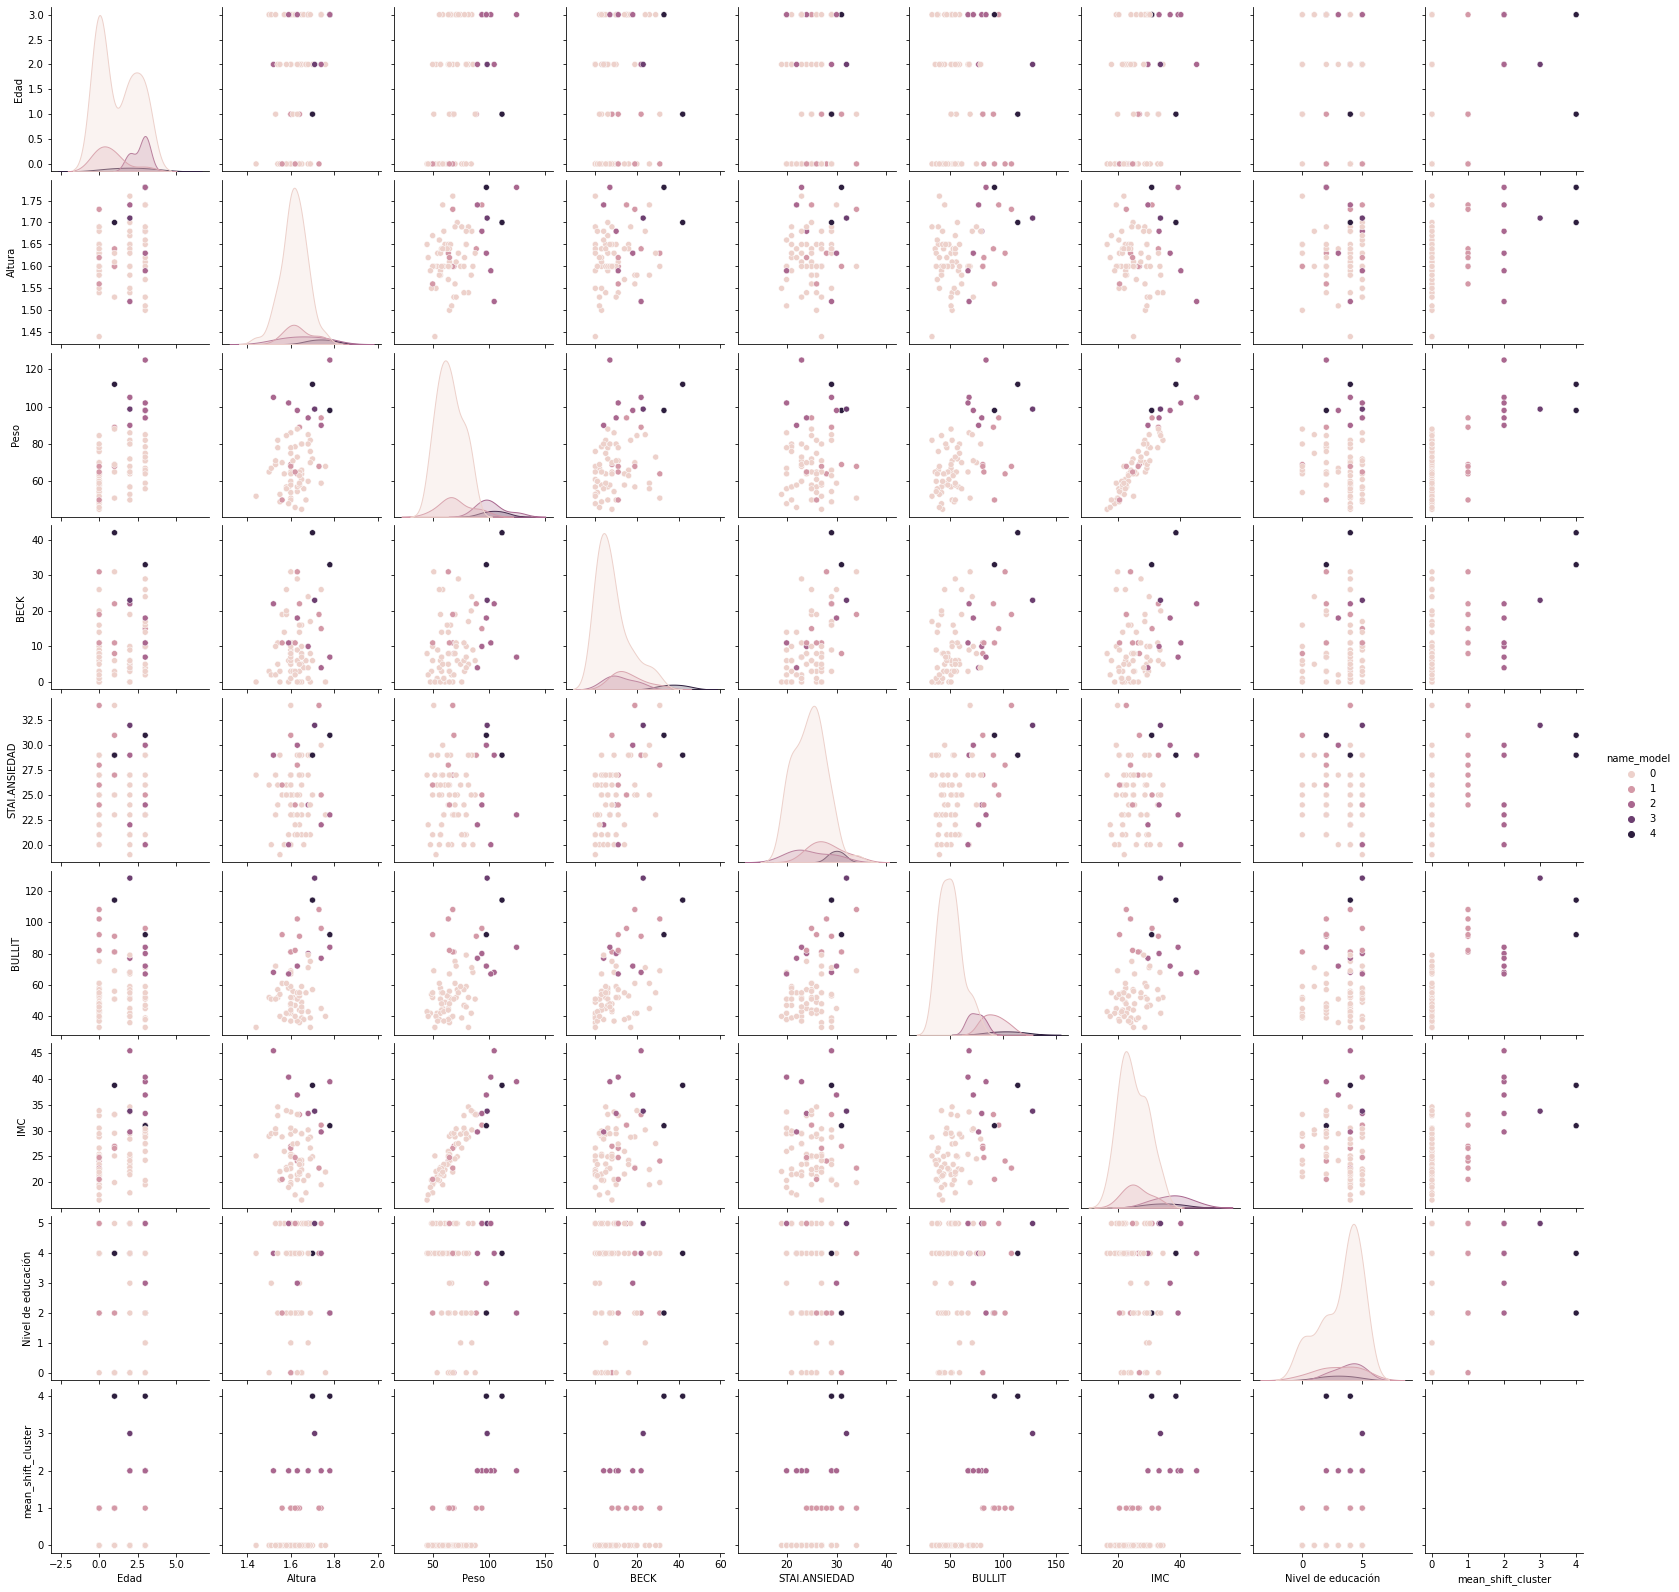

In [ ]:
df_op, ms = buscar_optimo(conjunto)
print_clusters(df_op, ms, "mean_shift")

Agglomerative Clustering

In [ ]:
from sklearn.cluster import AgglomerativeClustering

def agglomerative_clustering_model(df):
    optimo = []
    metricas_optimo = [-1, 80]
    for i in range(2, int(np.sqrt(df.shape[0]))):
        ac = AgglomerativeClustering(n_clusters=i)
        ac.fit(df)
        metricas = evaluacion_modelo(df, ac.labels_)
        if metricas[0]>metricas_optimo[0] and metricas[1]<metricas_optimo[1]:
            optimo = ac
            metricas_optimo = metricas
    print("Modelo: ", optimo)
    print("Metricas:")
    print(f"-- Indice de Silhuette (ideal 1): {metricas_optimo[0]:.3f}")
    print(f"-- Indice de Davies Bouldin (mejor menor): {metricas_optimo[1]:.3f}")
    return optimo, metricas_optimo

In [ ]:
conjunto = []

In [ ]:
ac, metricas = agglomerative_clustering_model(df)
conjunto.append((df,ac,metricas,"df"))

Modelo:  AgglomerativeClustering()
Metricas:
-- Indice de Silhuette (ideal 1): 0.417
-- Indice de Davies Bouldin (mejor menor): 1.001


In [ ]:
ac, metricas = agglomerative_clustering_model(df_n)
conjunto.append((df,ac,metricas,"df_n"))

Modelo:  AgglomerativeClustering()
Metricas:
-- Indice de Silhuette (ideal 1): 0.340
-- Indice de Davies Bouldin (mejor menor): 1.196


In [ ]:
ac, metricas = agglomerative_clustering_model(df_e)
conjunto.append((df,ac,metricas,"df_le"))

Modelo:  AgglomerativeClustering()
Metricas:
-- Indice de Silhuette (ideal 1): 0.295
-- Indice de Davies Bouldin (mejor menor): 1.353


In [ ]:
ac, metricas = agglomerative_clustering_model(df_l1)
conjunto.append((df,ac,metricas,"df_l1"))

Modelo:  AgglomerativeClustering()
Metricas:
-- Indice de Silhuette (ideal 1): 0.344
-- Indice de Davies Bouldin (mejor menor): 1.142


In [ ]:
ac, metricas = agglomerative_clustering_model(df_l2)
conjunto.append((df,ac,metricas,"df_l2"))

Modelo:  AgglomerativeClustering()
Metricas:
-- Indice de Silhuette (ideal 1): 0.352
-- Indice de Davies Bouldin (mejor menor): 1.124


In [ ]:
ac, metricas = agglomerative_clustering_model(df_max)
conjunto.append((df,ac,metricas,"df_max"))

Modelo:  AgglomerativeClustering(n_clusters=4)
Metricas:
-- Indice de Silhuette (ideal 1): 0.309
-- Indice de Davies Bouldin (mejor menor): 1.033


DataFrame optimo: df
Modelo optimo: AgglomerativeClustering()
Cantidad de clusters: 2
Metricas:
-- Indice de Silhuette (ideal 1): 0.417
-- Indice de Davies Bouldin (mejor menor): 1.001


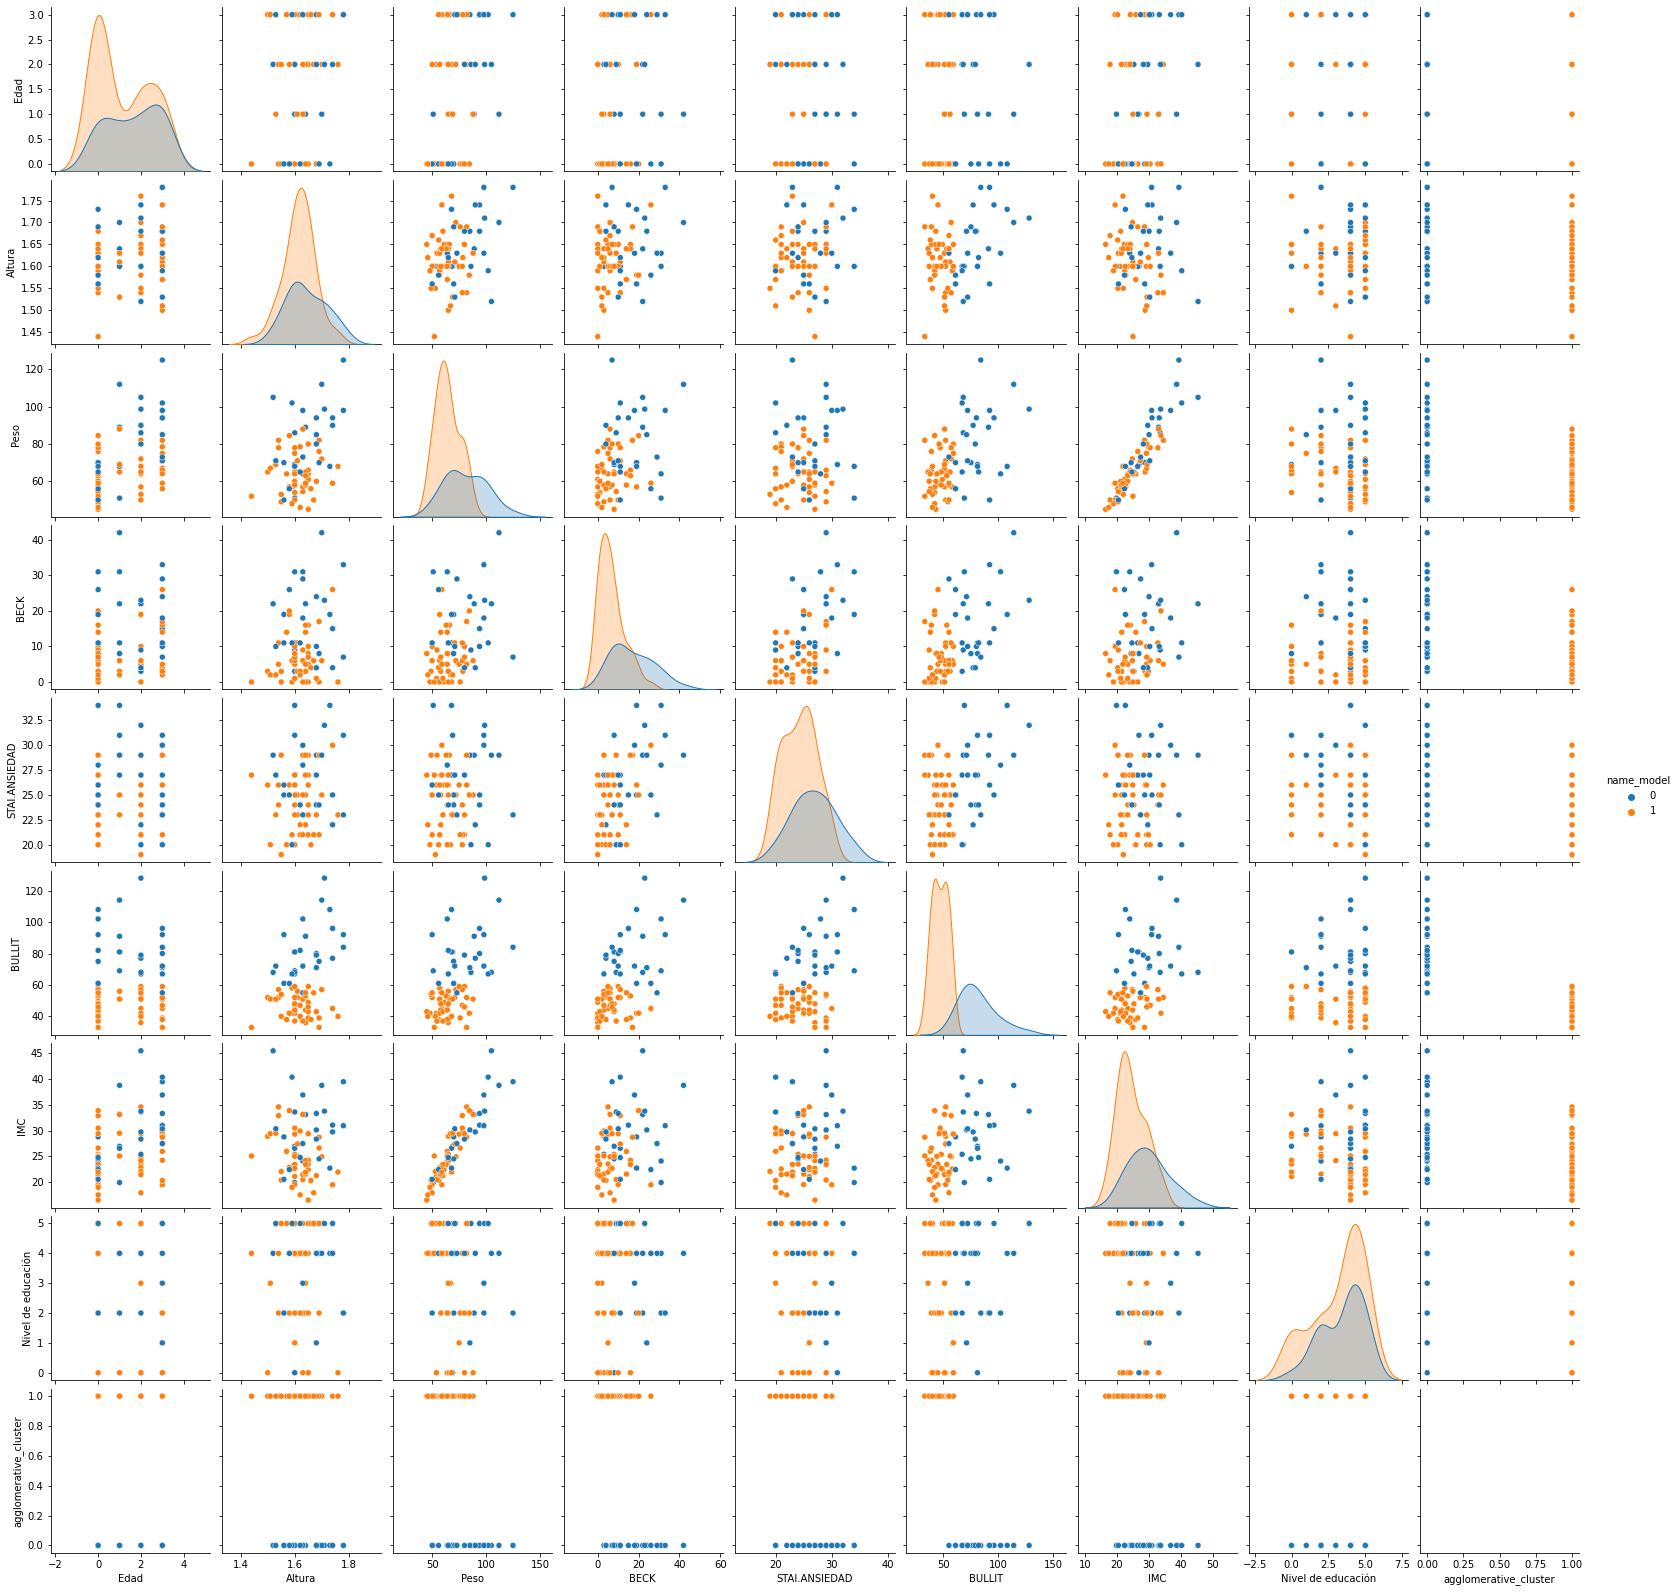

In [ ]:
df_op, ac = buscar_optimo(conjunto)
print_clusters(df_op, ac, "agglomerative")

In [ ]:
df_op = pd.DataFrame.copy(df) 
df_op['label'] = ac.labels_

df_op = df_op.set_index(df.index)

In [ ]:
df_op[(df_op['label']==0)]

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación,label
2,2,1.52,105.0,22,29,68,45.446676,4,0
6,3,1.74,94.0,15,25,96,31.047695,5,0
8,1,1.60,51.0,31,34,69,19.921875,4,0
9,1,1.60,69.0,8,31,81,26.953125,0,0
11,1,1.64,89.0,22,29,91,33.090422,2,0
16,2,1.60,65.0,3,27,67,25.390625,2,0
19,1,1.60,68.0,11,27,81,26.562500,4,0
20,0,1.56,70.0,19,25,61,28.763971,2,0
21,0,1.63,64.0,31,28,102,24.088223,2,0
23,2,1.60,86.0,9,20,68,33.593750,5,0


In [ ]:
df_op[(df_op['label']==0)].describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,27.0,1.629630,1.213645,0.000000,0.500000,2.000000,3.000000,3.000000
Altura,27.0,1.644444,0.072501,1.520000,1.600000,1.630000,1.695000,1.780000
Peso,27.0,81.359259,19.116852,50.000000,68.000000,80.000000,96.000000,125.000000
BECK,27.0,17.074074,10.280399,3.000000,9.500000,15.000000,23.500000,42.000000
STAI.ANSIEDAD,27.0,26.851852,3.799835,20.000000,24.000000,27.000000,29.000000,34.000000
BULLIT,27.0,81.222222,17.223270,55.000000,68.500000,79.000000,91.500000,128.000000
IMC,27.0,29.972388,6.371016,19.921875,25.079095,29.726516,33.449369,45.446676
Nivel de educación,27.0,3.444444,1.423250,0.000000,2.000000,4.000000,4.500000,5.000000
label,27.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
df_op[(df_op['label']==1)]

,Edad,Altura,Peso,BECK,STAI.ANSIEDAD,BULLIT,IMC,Nivel de educación,label
0,3,1.50,65.0,3,26,52,28.888889,0,1
1,0,1.65,61.0,0,26,49,22.405877,5,1
3,0,1.60,54.0,1,26,42,21.093750,0,1
4,2,1.65,64.0,5,24,45,23.507805,0,1
5,3,1.51,67.0,2,20,51,29.384676,3,1
7,2,1.54,82.0,5,26,52,34.575814,4,1
10,3,1.65,66.0,16,29,39,24.242424,0,1
12,3,1.74,59.0,26,30,45,19.487383,4,1
13,2,1.65,80.0,10,21,59,29.384757,0,1
14,2,1.76,68.0,0,23,40,21.952479,0,1


In [ ]:
df_op[(df_op['label']==1)].describe().T

,count,mean,std,min,25%,50%,75%,max
Edad,47.0,1.127660,1.261762,0.000000,0.000000,0.000000,2.000000,3.000000
Altura,47.0,1.615106,0.059887,1.440000,1.590000,1.620000,1.650000,1.760000
Peso,47.0,64.074468,11.051745,45.000000,57.000000,64.000000,71.500000,88.000000
BECK,47.0,6.574468,6.198684,0.000000,2.000000,5.000000,9.500000,26.000000
STAI.ANSIEDAD,47.0,24.276596,2.983302,19.000000,21.500000,25.000000,26.000000,30.000000
BULLIT,47.0,46.744681,7.287476,33.000000,41.000000,47.000000,52.000000,59.000000
IMC,47.0,24.640190,4.525305,16.528926,21.509059,23.507805,28.799684,34.575814
Nivel de educación,47.0,3.212766,1.731249,0.000000,2.000000,4.000000,4.500000,5.000000
label,47.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


coordenadas paralelas ---- simon altair, holoviews

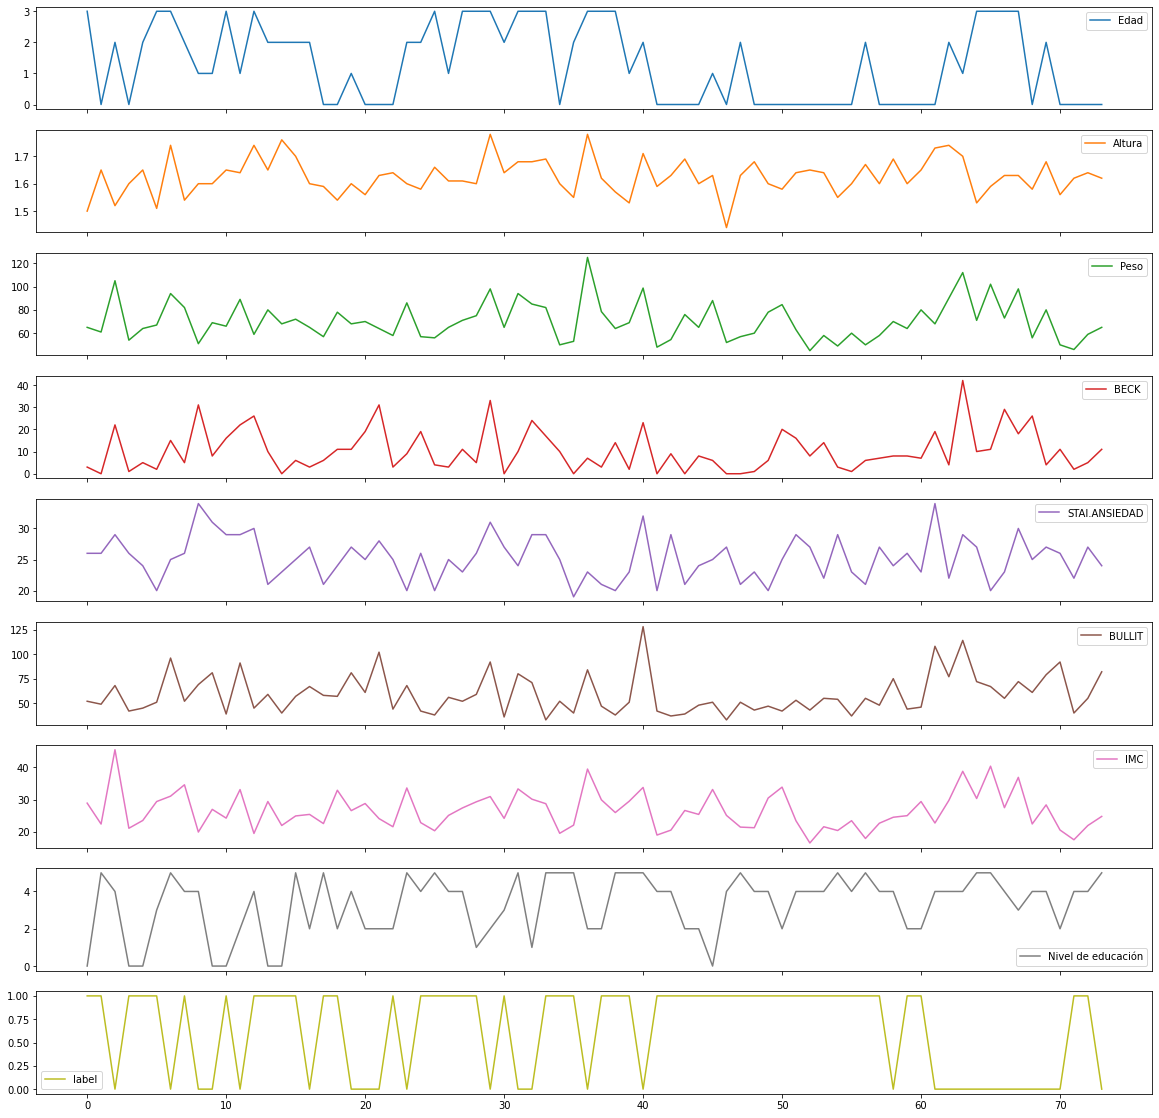

In [ ]:
#Diagramas con respecto al atributo 'diagnosis'
df_op.plot(label='Edad', subplots=True, figsize=(20,20))
plt.show()

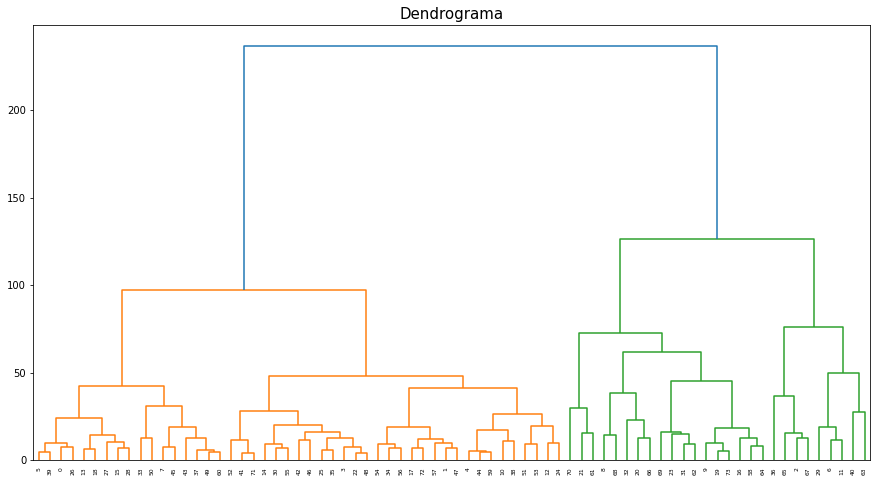

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(15, 8))  
plt.title("Dendrograma", fontsize = 15)  
dend = shc.dendrogram(shc.linkage(df_op, method='ward'))

In [ ]:
from dash import Dash, html, dcc
import plotly.express as px
import pandas as pd

app = Dash(__name__)

# assume you have a "long-form" data frame
# see https://plotly.com/python/px-arguments/ for more options
df = pd.DataFrame({
    "Fruit": ["Apples", "Oranges", "Bananas", "Apples", "Oranges", "Bananas"],
    "Amount": [4, 1, 2, 2, 4, 5],
    "City": ["SF", "SF", "SF", "Montreal", "Montreal", "Montreal"]
})

fig = px.bar(df, x="Fruit", y="Amount", color="City", barmode="group")

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=fig
    )
])

if __name__ == '__main__':
    app.run_server(debug=True)

ModuleNotFoundError: ignored

In [ ]:
pip install dash

In [ ]:
import dash
import dash_core_components as dcc
import dash_html_components as html
import plotly.express as px
from dash.dependencies import Input,Output

In [ ]:
app = dash.Dash(__name__)

app.layout = html.Div([
    
    html.Div([
        html.H1('Vacunados por covid'),
    ], className = 'banner'),
])

if __name__ == ('__main__'):
    app.run_server(debug=True)